# House Price Prediction and Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# URL for the raw data
data_url = 'http://jse.amstat.org/v19n3/decock/AmesHousing.txt'

# Load the data into the Pandas DataFrame
# Specify the tab (\t) as the separator
try:
    df = pd.read_csv(data_url, sep='\t')

    # Display first 5 rows to verify data
    print(f"Data loaded successfully! Shape: {df.shape}")
    display(df.head())

except Exception as e:
    print(f"An error occurred during data loading: {e}")

Data loaded successfully! Shape: (2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
# Identify columns where 'NA' means 'None' (no feature)
cols_none = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu',
             'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
             'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
             'BsmtFin Type 2', 'Mas Vnr Type', 'Electrical', 'MS Zoning']

# Fill NA in these columns with the string 'None'
df[cols_none] = df[cols_none].fillna('None')

# Handle the 1 missing value in Electrical by filling with the mode (most frequent)
# df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [4]:
# For numerical features, where NA likely means 'None' (zero size/count):
# Fill missing Garage/Basement SF, Garage Cars, and Mas Vnr Area with 0.0
cols_zero = ['Garage Yr Blt', 'Garage Area', 'Garage Cars', 'BsmtFin SF 1',
             'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Mas Vnr Area',
             'Bsmt Full Bath', 'Bsmt Half Bath']

df[cols_zero] = df[cols_zero].fillna(0)

In [5]:
# Lot Frontage is best imputed with the median of the surrounding area (Neighborhood)
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.median()))

In [6]:
missing_data = df.isnull().sum().sort_values(ascending=False)
# Display only columns with more than 0 missing values
print(missing_data[missing_data > 0])

Lot Frontage    3
dtype: int64


In [7]:
# Display summary information about the DataFrame
print("--- DataFrame Info ---")
df.info()

print("\n--- Descriptive Statistics for Numerical Columns ---")
# Display descriptive statistics for only numerical columns
display(df.describe())

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2927 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            2930 non-null   object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   obje

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2927.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.464640,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.096928,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,21.729533,7880.017759,1.411026,1.111537,30.245361,20.860286,178.634545,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,60.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,70.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,162.750000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


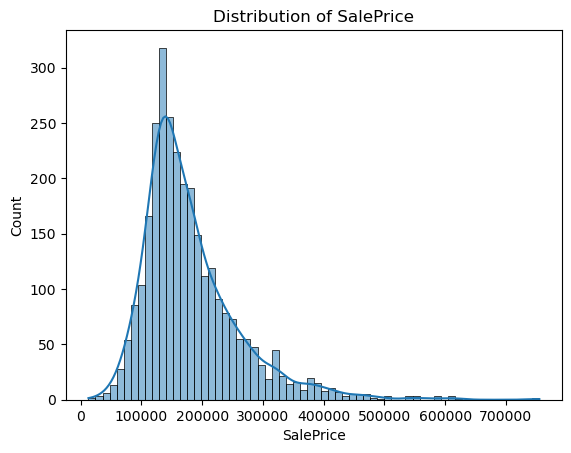

Skewness: 1.7435000757376466


In [8]:
# Create a histogram and a normal probability plot of the SalePrice
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

# Check for skewness
print(f"Skewness: {df['SalePrice'].skew()}")

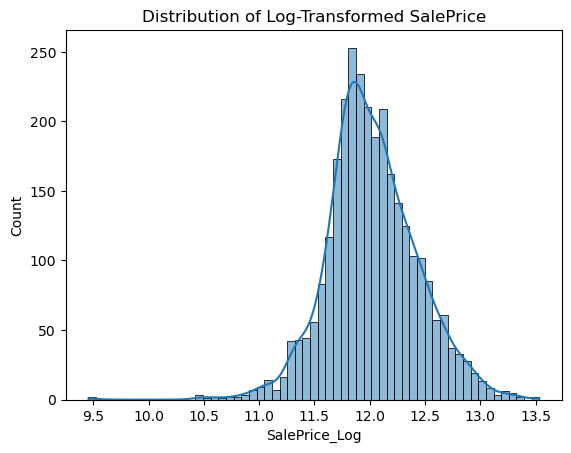

Skewness after log transformation: -0.0148


In [9]:
# Create a new column, using the log(1+x) transformation to handle the skewness.
# Log(1+x) is used instead of log(x) to prevent errors if any values were zero.
df['SalePrice_Log'] = np.log1p(df['SalePrice'])

# Re-run the histogram and skewness check on the new log-transformed column
sns.histplot(df['SalePrice_Log'], kde=True)
plt.title('Distribution of Log-Transformed SalePrice')
plt.show()

# Check the new skewness
print(f"Skewness after log transformation: {df['SalePrice_Log'].skew():.4f}")

In [10]:
# Assuming the current state of df contains 'SalePrice_Log' and the 43 object columns

# 1. Drop the original ID columns (already done, but safe to re-run)
df.drop(['Order', 'PID', 'SalePrice'], axis=1, errors='ignore', inplace=True)

# 2. Separate the target and features
Y = df['SalePrice_Log']
# X contains all 43 non-numeric columns and 276 numeric columns
X = df.drop(['SalePrice_Log'], axis=1)

# 3. PERFORM ONE-HOT ENCODING
# pd.get_dummies automatically processes all 'object' type columns
X = pd.get_dummies(X)

print(f"Number of features after One-Hot Encoding: {len(X.columns)}")

Number of features after One-Hot Encoding: 319


In [11]:
from sklearn.model_selection import train_test_split

# Split the data 80% for training and 20% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Training set size (X_train): {X_train.shape}")

Training set size (X_train): (2344, 319)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Ensure X and Y are correctly defined from your clean/encoded data:
Y = df['SalePrice_Log']
X = df.drop(['SalePrice_Log'], axis=1)
X = pd.get_dummies(X) # Re-run the critical encoding step!

# 1. FINAL NaN IMPUTATION STEP (The FIX for the error)
# Fill any remaining NaN values in the feature set with the mean of that column.
X.fillna(X.mean(), inplace=True)

# 2. Split the data 80% for training and 20% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Data split complete and all NaNs imputed.")

Data split complete and all NaNs imputed.


In [13]:
# 1. Initialize and Train the Model
lr = LinearRegression()
lr.fit(X_train, Y_train)

# 2. Make Predictions on the Test Set
Y_pred_log = lr.predict(X_test)

# 3. Evaluate Performance (in log space)
rmse_log = np.sqrt(mean_squared_error(Y_test, Y_pred_log))

# 4. Convert RMSE back to original dollar units (for your README)
rmse_dollars = np.expm1(rmse_log)

print("--- Linear Regression Results ---")
print(f"RMSE (Original Dollar Units): ${rmse_dollars:.2f}")

--- Linear Regression Results ---
RMSE (Original Dollar Units): $0.15
